# **Medical Insurance Cost Prediction**

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data collection and EDA

In [18]:
# loading the data
insurance_data = pd.read_csv('insurance.csv')

insurance_data.sample(5)

,age,sex,bmi,children,smoker,region,charges
407,47,female,23.600,1,no,southwest,8539.67100
852,46,female,35.530,0,yes,northeast,42111.66470
333,56,female,28.785,0,no,northeast,11658.37915
419,63,female,26.980,0,yes,northwest,28950.46920
944,62,male,39.930,0,no,southeast,12982.87470


In [6]:
insurance_data.shape

(1338, 7)

In [7]:
# getting some info about dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Categorical features:**

* Sex
* Smoker
* Region

In [8]:
# checking for missing values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
# Data Analysis
# Statistical measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-10-8bc559334f8c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


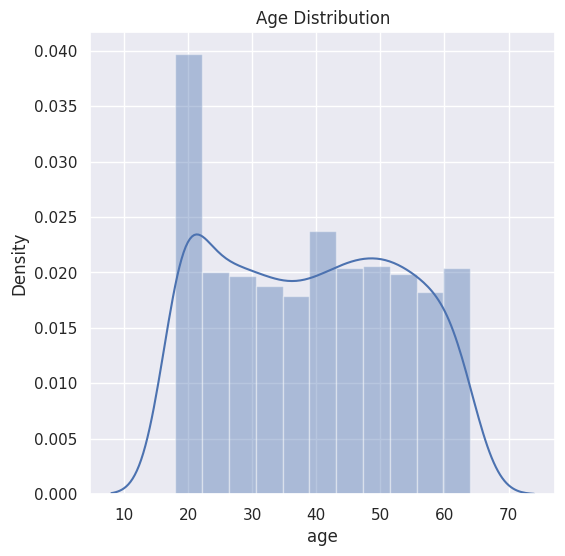

In [10]:
# distribution of the age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

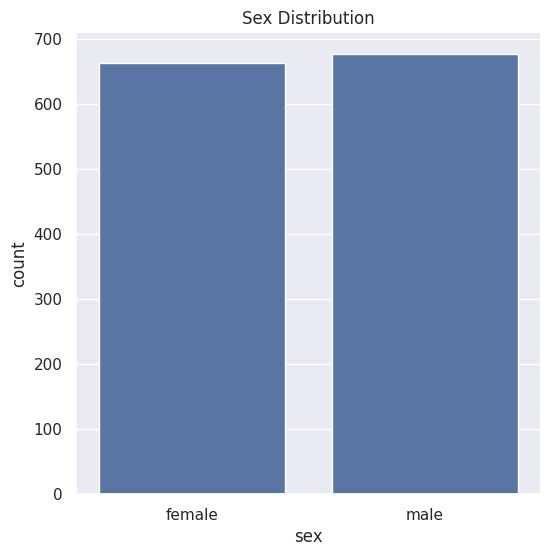

In [11]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [12]:
insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-13-1a24dc083e5b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


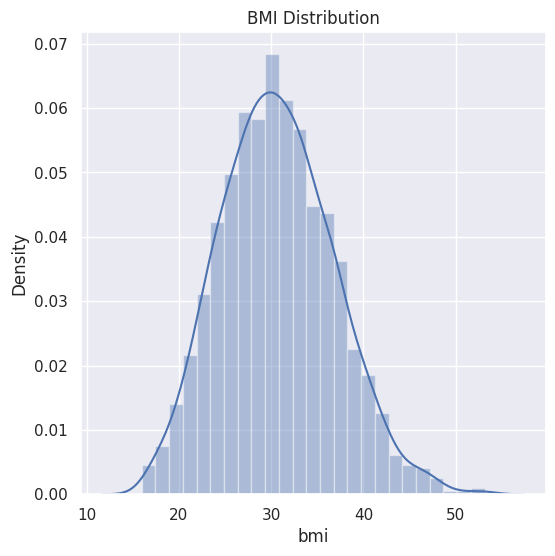

In [13]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

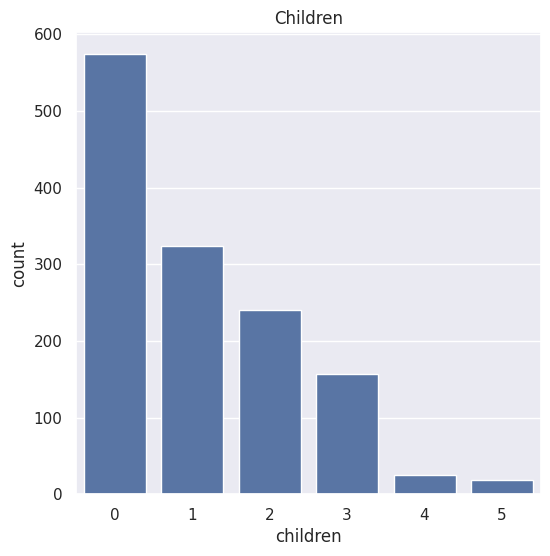

In [14]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data = insurance_data)
plt.title('Children')
plt.show()

In [15]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


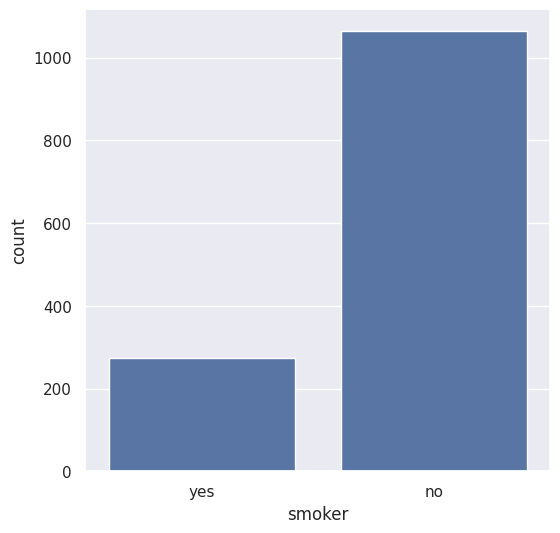

In [19]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data= insurance_data)
plt.show()

In [20]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


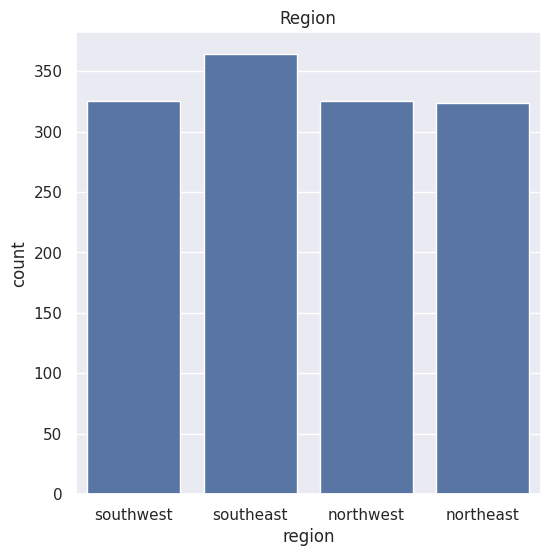

In [21]:
# region column
plt.figure(figsize=(6,6))
plt.title('Region')
sns.countplot(x='region', data=insurance_data)
plt.show()

In [22]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-24-55b2538ab07a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


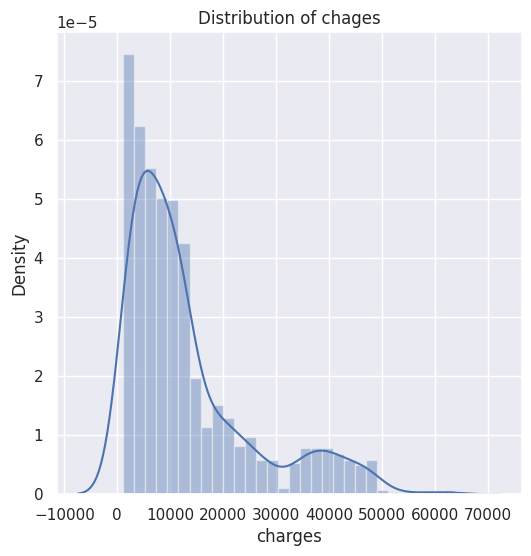

In [24]:
# distribution of charges column values
plt.figure(figsize=(6,6))
plt.title('Distribution of chages')
sns.distplot(insurance_data['charges'])
plt.show()

Data preprocessing
<br>

Encoding the categorical Values


In [31]:
# Encoding smoker column
insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace =True)

# Encoding sex column
insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace =True)

# encoding region column
insurance_data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

<ipython-input-31-6d72b722cecb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace =True)
<ipython-input-31-6d72b722cecb>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace =True)
<ipython-input-31-6d72b722cecb>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

In [34]:
# spliting the features and target
x = insurance_data.drop(columns=['charges'], axis=1)
y=insurance_data['charges']

In [35]:
print(x), print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


(None, None)

## split the data into training and test data

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [39]:
print(y_test)

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64


## **Model training**

## Linear Regression

In [40]:
lr = LinearRegression()

lr.fit(x_train, y_train)


LinearRegression()

## Evaluation

In [41]:
# prediction on training data
train_pred = lr.predict(x_train)

In [44]:
# r squared value
r2_train = metrics.r2_score(y_train, train_pred)
print('r2 value:', r2_train)

r2 value: 0.751505643411174


In [45]:
# prediction on test data
test_pred = lr.predict(x_test)


In [47]:
# r sqaured value
r2_test = metrics.r2_score(y_test, test_pred)
print(r2_test)

0.7447273869684076


## Build predictive system

In [50]:
input_data = (31,1,25.74,0,1,0)

# converting to the numpy array
input_data_to_numpy_array = np.asarray(input_data)

# reshape the array
reshaped_input = input_data_to_numpy_array.reshape(1,-1)

prediction = lr.predict(reshaped_input)
print(prediction)

print('The Insurance cost is:', prediction[0])

[3760.0805765]
The Insurance cost is: 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
